In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [152]:
years_collection = {}
for year in range(1900, 2005, 5):
    years_collection[year] = pd.read_csv(
    '/Users/yvdsd/SandBox/names/yob{}.txt'.format(year),
    names = ['Name', 'Gender', 'Count'])
years_all = pd.concat(years_collection, names = ["Years", "Pos"])

## Задание 1

##### Построить график изменения количества имен Ruth и Robert с 1900 по 2000

In [153]:
Ruth_Robert = years_all.groupby([years_all.index.get_level_values(0), 'Name']).sum()\
.query('Name == ["Ruth", "Robert"]')

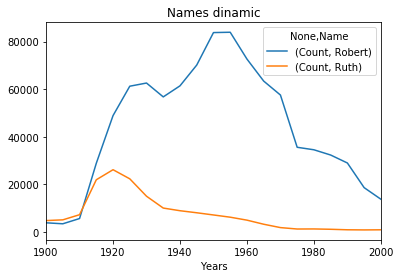

In [154]:
Ruth_Robert_chart = Ruth_Robert.unstack('Name')
Ruth_Robert_chart.plot(title= 'Names dinamic')

## Задание 2

##### Построить гистограмму по количеству их имен с 1900 по 2000 с 5-летними промежутками (1900, 1905, 1910, …, 1995, 2000).

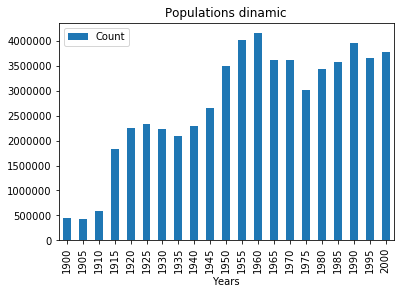

In [155]:
names_per_years = years_all.groupby([years_all.index.get_level_values(0)]).sum()
names_per_years.plot.bar(title = 'Populations dinamic')

## Задание 3

##### Построить круговую диаграмму по количеству употреблений для ТОП-10 популярных имен, начинающихся на R, за 1950 год.

In [156]:
names_1950 = pd.read_csv('/Users/yvdsd/SandBox/names/yob1950.txt', 
                        names = ['Name', 'Gender', 'Count'],
                        index_col = False)

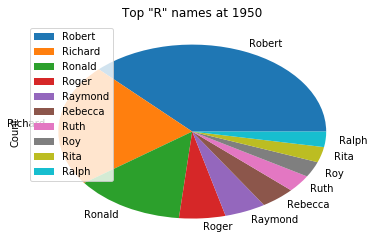

In [157]:
names_1950[names_1950.Name.str.startswith('R')].groupby('Name').sum()\
.sort_values(by='Count', ascending = False).head(10).plot.pie(y = 'Count', title = 'Top "R" names at 1950')

## Задание 4

##### Построить точечную диаграмму по количеству согласных букв в именах и частоте употребления за 100 лет. Т.е. необходимо сложить всю статистику с 1900 до 2000, сгруппировать по именам, посчитать количество согласных букв в каждом имени и вывести на график отношение "Количество согласных букв в имени" : "Количество употреблений".

In [163]:
years = {}
for year in range(1900, 2001, 1):
    years[year] = pd.read_csv(
    '/Users/yvdsd/SandBox/names/yob{}.txt'.format(year),
    names = ['Name', 'Gender', 'Count'])
years_100 = pd.concat(years_collection)

In [173]:
years_100_names = years_100.groupby(['Name'], as_index=False).sum()

In [174]:
years_100.head(10)

Name Gender  Count
1900 0       Mary      F  16706
     1      Helen      F   6343
     2       Anna      F   6114
     3   Margaret      F   5304
     4       Ruth      F   4765
     5  Elizabeth      F   4096
     6   Florence      F   3920
     7      Ethel      F   3896
     8      Marie      F   3856
     9    Lillian      F   3414

In [184]:
years_100_names['a'] = years_100_names.apply(lambda row: sum(['a'] in row.Name), axis=1)

TypeError: ("'in <string>' requires string as left operand, not list", 'occurred at index 0')

In [183]:
years_100_names.head(10)

,Name,Count,Len
0,Aadam,12,5
1,Aadarsh,5,7
2,Aadil,29,5
3,Aaditya,11,7
4,Aage,7,4
5,Aagot,5,5
6,Aahil,6,5
7,Aailiyah,5,8
8,Aailyah,15,7
9,Aaisha,27,6
